In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# 1) Mô tả dữ liệu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.shape

(1460, 81)

In [6]:
df.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


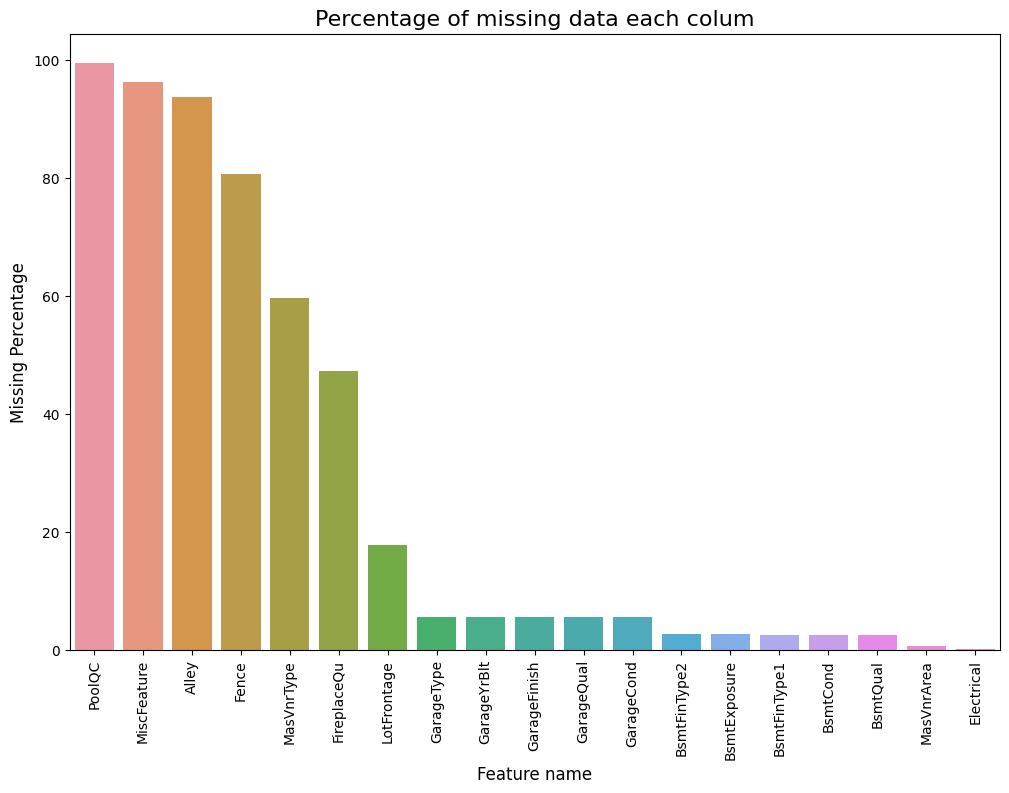

In [8]:
missing_percentage = (df.isnull().sum() / len(df))*100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.xticks(rotation=90)
plt.title('Percentage of missing data each colum', fontsize=16)
plt.xlabel('Feature name',fontsize=12)
plt.ylabel('Missing Percentage', fontsize=12)
plt.show()

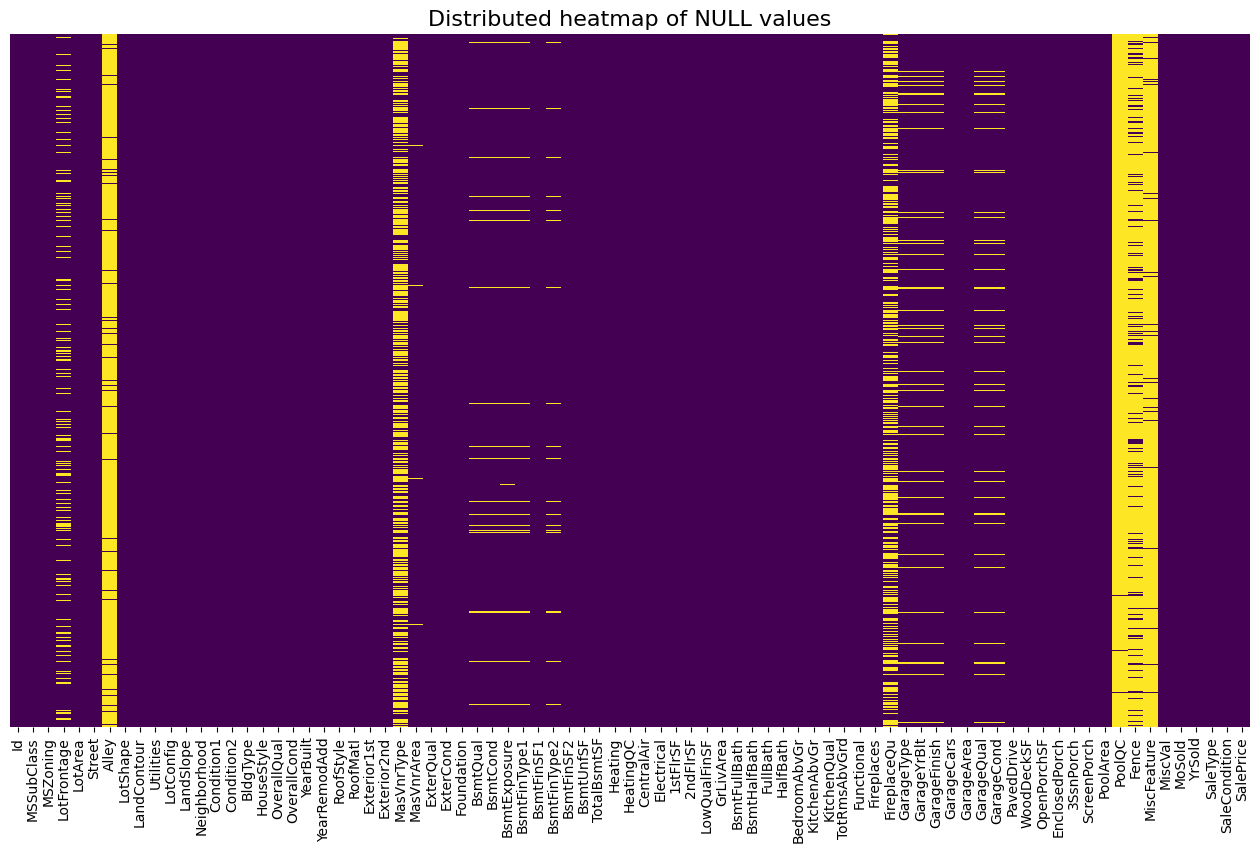

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Distributed heatmap of NULL values', fontsize=16)
plt.show()

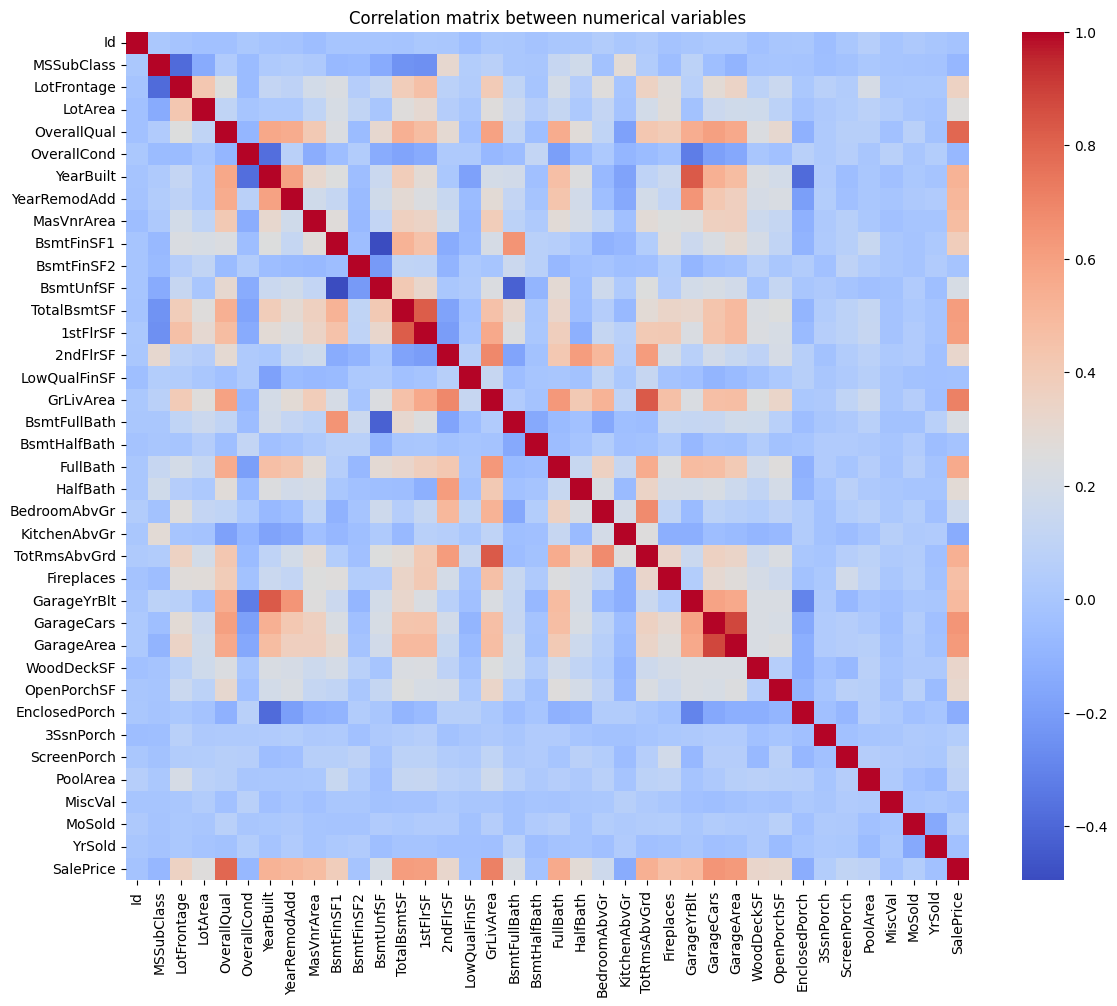

In [10]:
# Lấy các giá trị numeric để so sánh tương quan
numeric_cols = df.select_dtypes(include=['number']).columns

# Heatmap cho các giá trị numeric
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm')
plt.tight_layout()
plt.title("Correlation matrix between numerical variables")
plt.show()

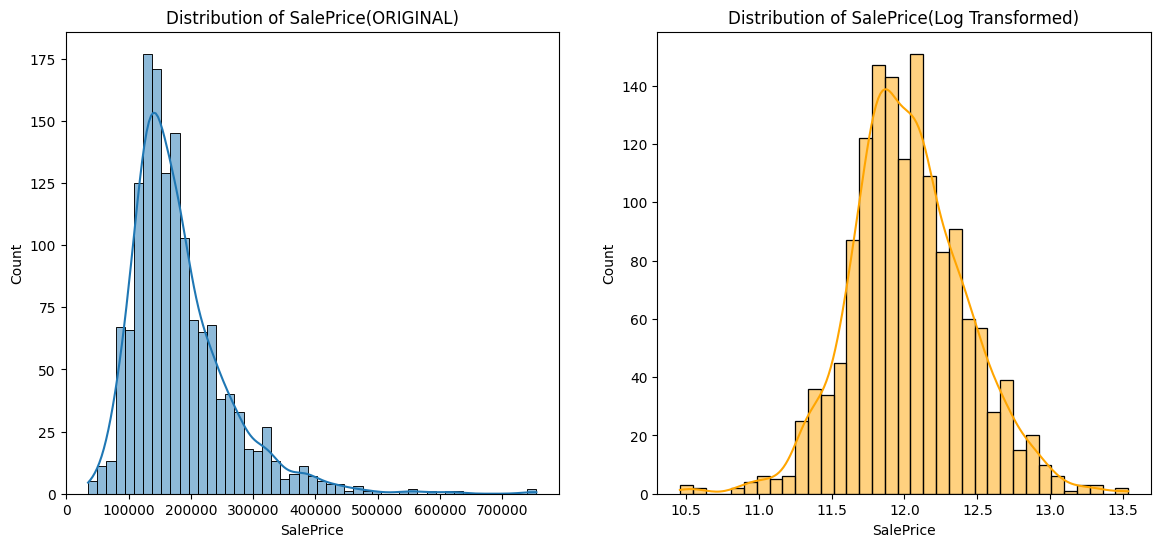

In [11]:
TARGET_COL = 'SalePrice'

RANDOM_STATE = 42

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(df[TARGET_COL], kde=True)
plt.title(f"Distribution of {TARGET_COL}(ORIGINAL)")

df[TARGET_COL]= np.log1p(df[TARGET_COL])

plt.subplot(1,2,2)
sns.histplot(df[TARGET_COL], kde=True, color='orange')
plt.title(f"Distribution of {TARGET_COL}(Log Transformed)")
plt.show()

In [12]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
import numpy as np


categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Encode biến categorical (giữ nguyên bước này)
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df[col].astype(str))

X_cat = df_encoded[categorical_cols]
y = df_encoded['SalePrice']

mi_scores = mutual_info_regression(X_cat, y, discrete_features=True, random_state=42)

feat_scores = pd.DataFrame({'Feature': categorical_cols, 'MI_Score': mi_scores})
feat_scores = feat_scores.sort_values(by='MI_Score', ascending=False)

top10_cat = feat_scores.head(10)

print("--- Xếp hạng bằng Mutual Information ---")
print(top10_cat)

--- Xếp hạng bằng Mutual Information ---
         Feature  MI_Score
8   Neighborhood  0.531616
18     ExterQual  0.327918
21      BsmtQual  0.325342
30   KitchenQual  0.324875
34  GarageFinish  0.261419
32   FireplaceQu  0.209302
33    GarageType  0.200588
20    Foundation  0.196644
27     HeatingQC  0.160911
16   Exterior2nd  0.156457


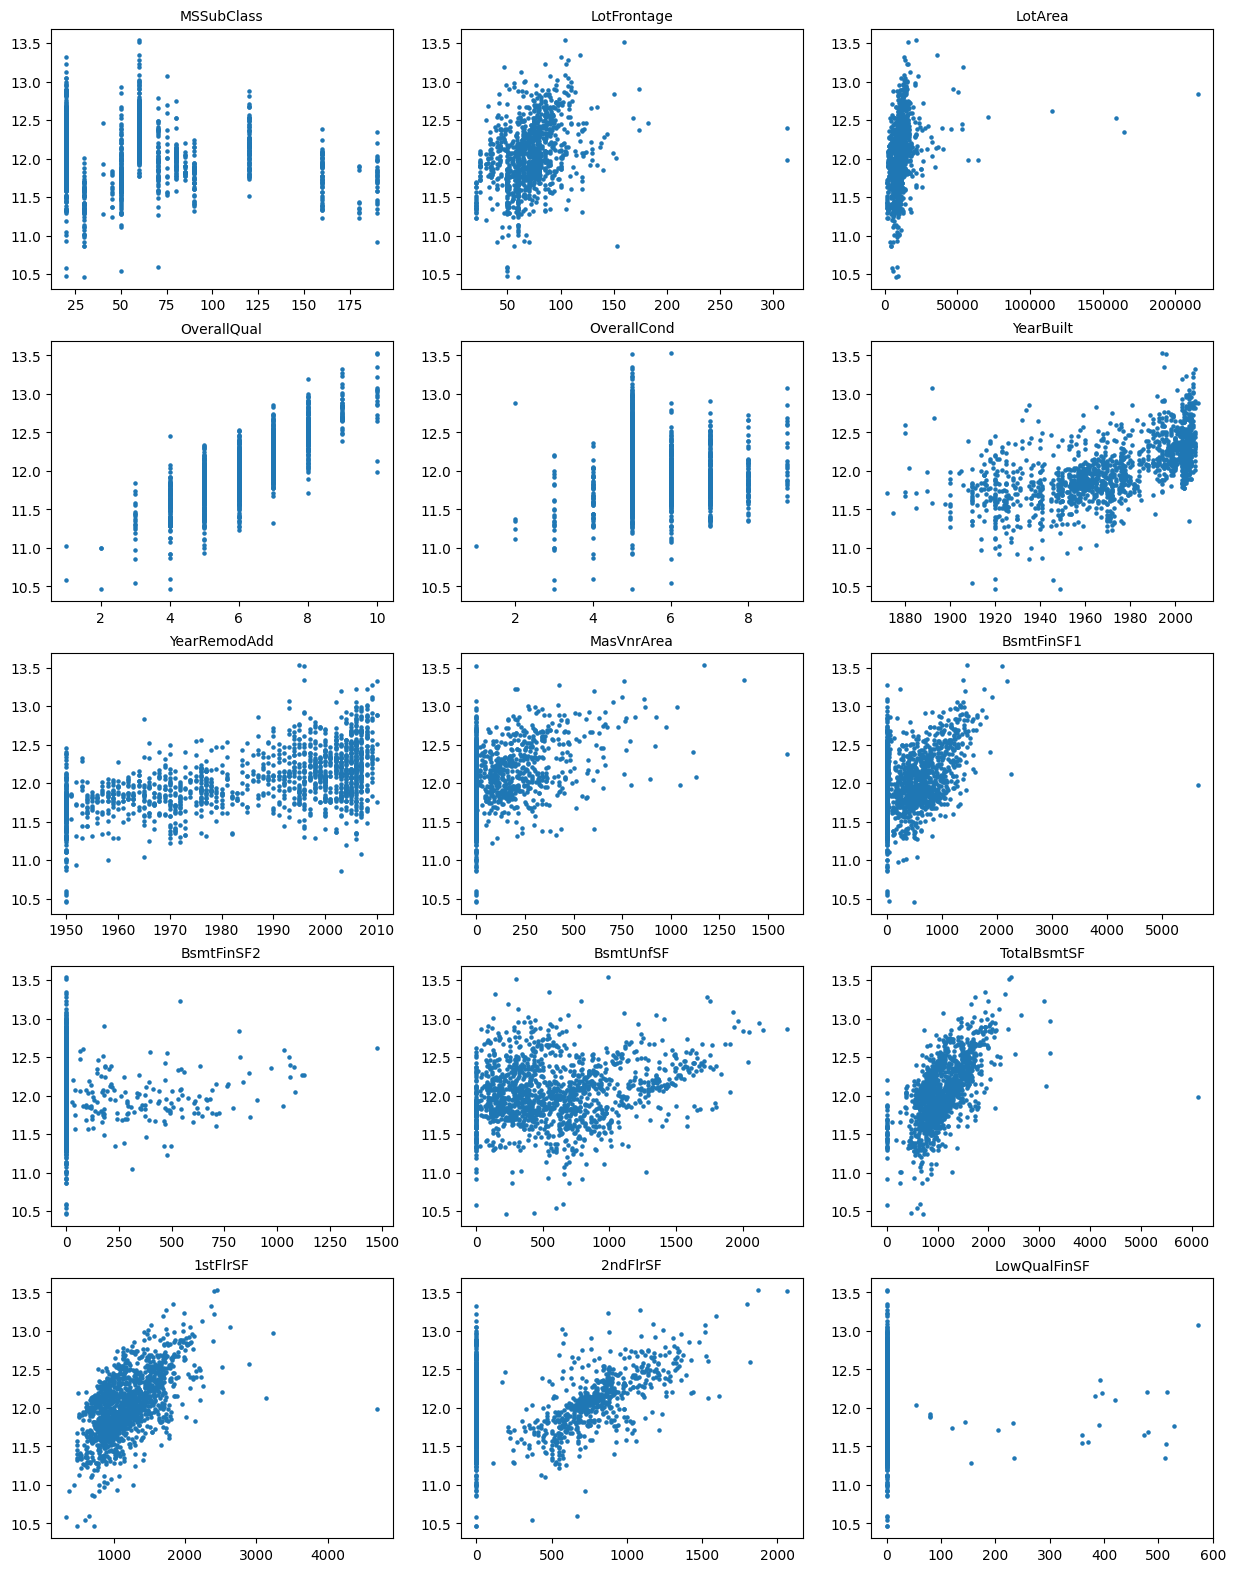

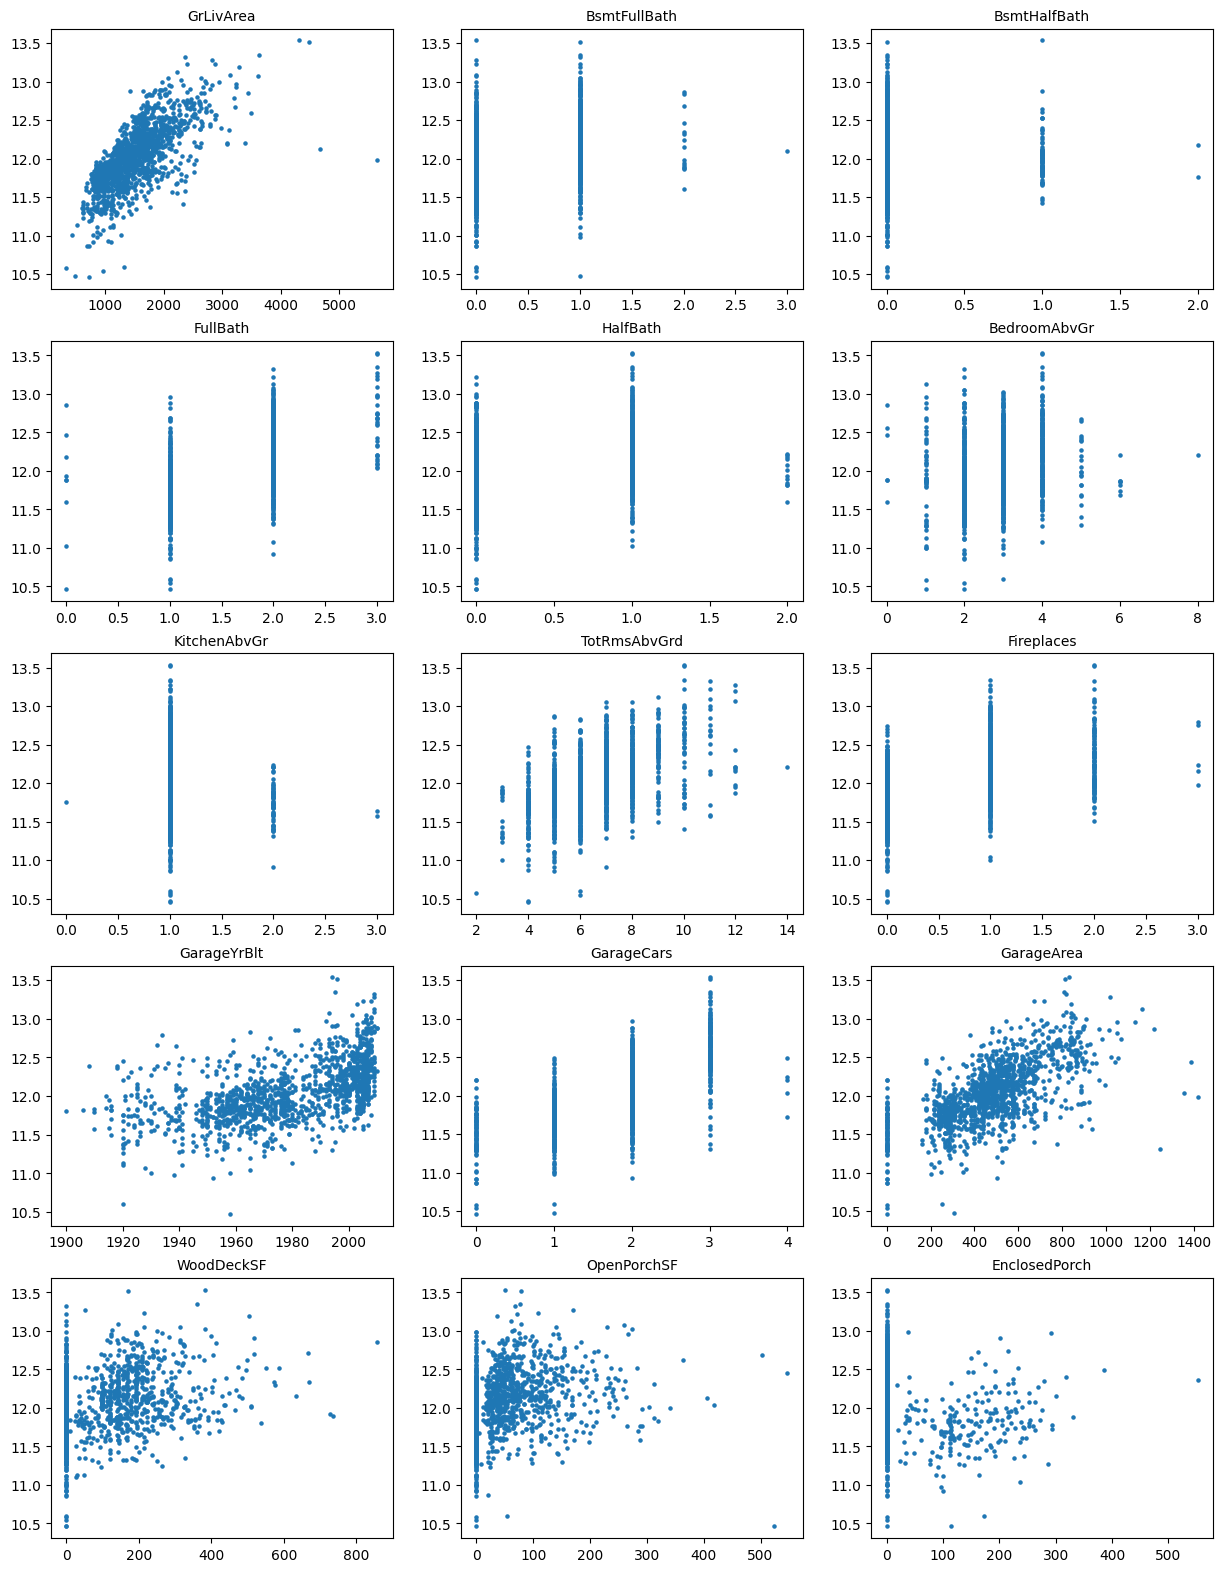

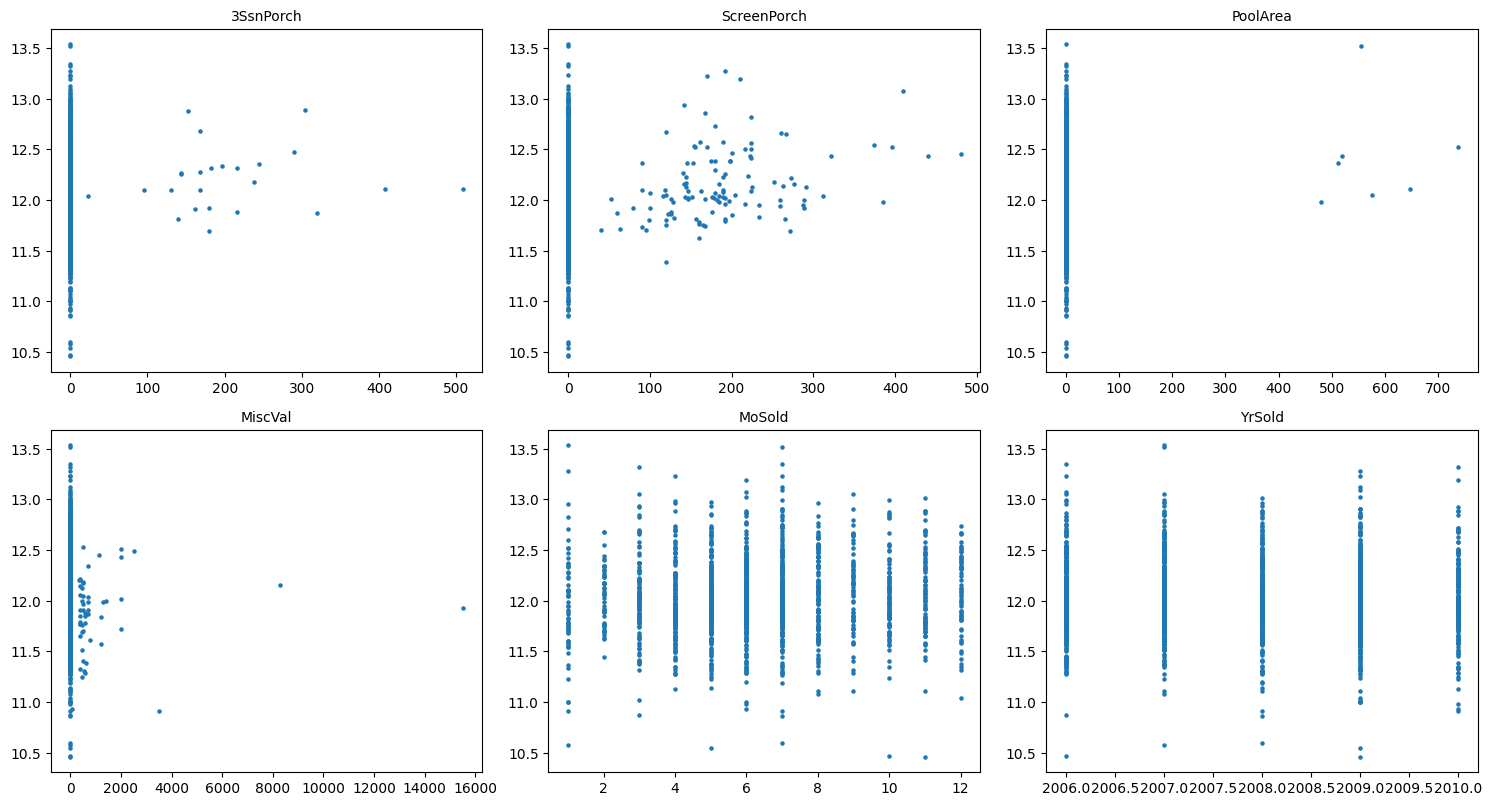

In [13]:
import math


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'SalePrice' and col != "Id"]

n = len(numerical_cols)

cols = 3
rows = math.ceil(n / cols)

group_size = 15

groups = [numerical_cols[i:i+group_size] for i in range(0, len(numerical_cols), group_size)]

for group_index, group in enumerate(groups):
    plt.figure(figsize=(cols * 5, rows * 4))

    for i, col in enumerate(group, 1):
        plt.subplot(rows, cols, i)
        plt.scatter(df[col], df['SalePrice'], s=5)
        plt.title(col, fontsize=10)
        plt.xlabel("")
        plt.ylabel("")

plt.tight_layout()
plt.show()

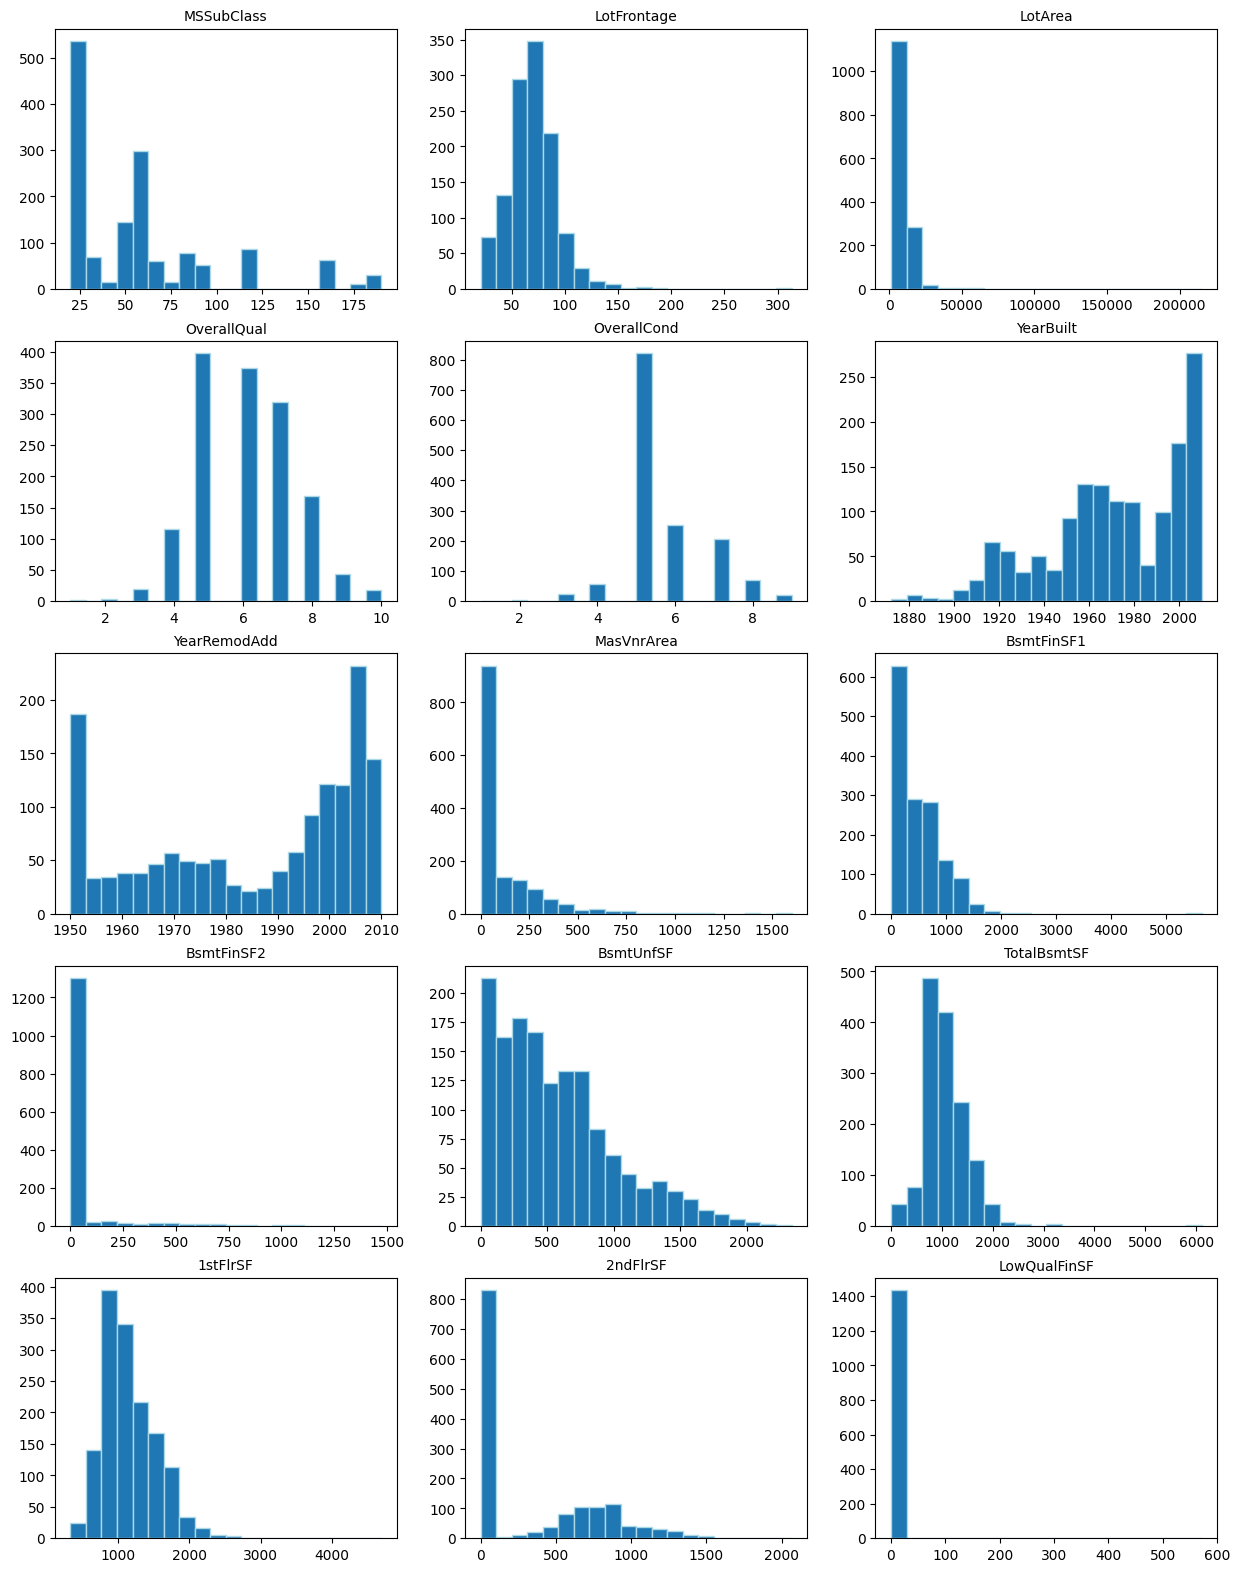

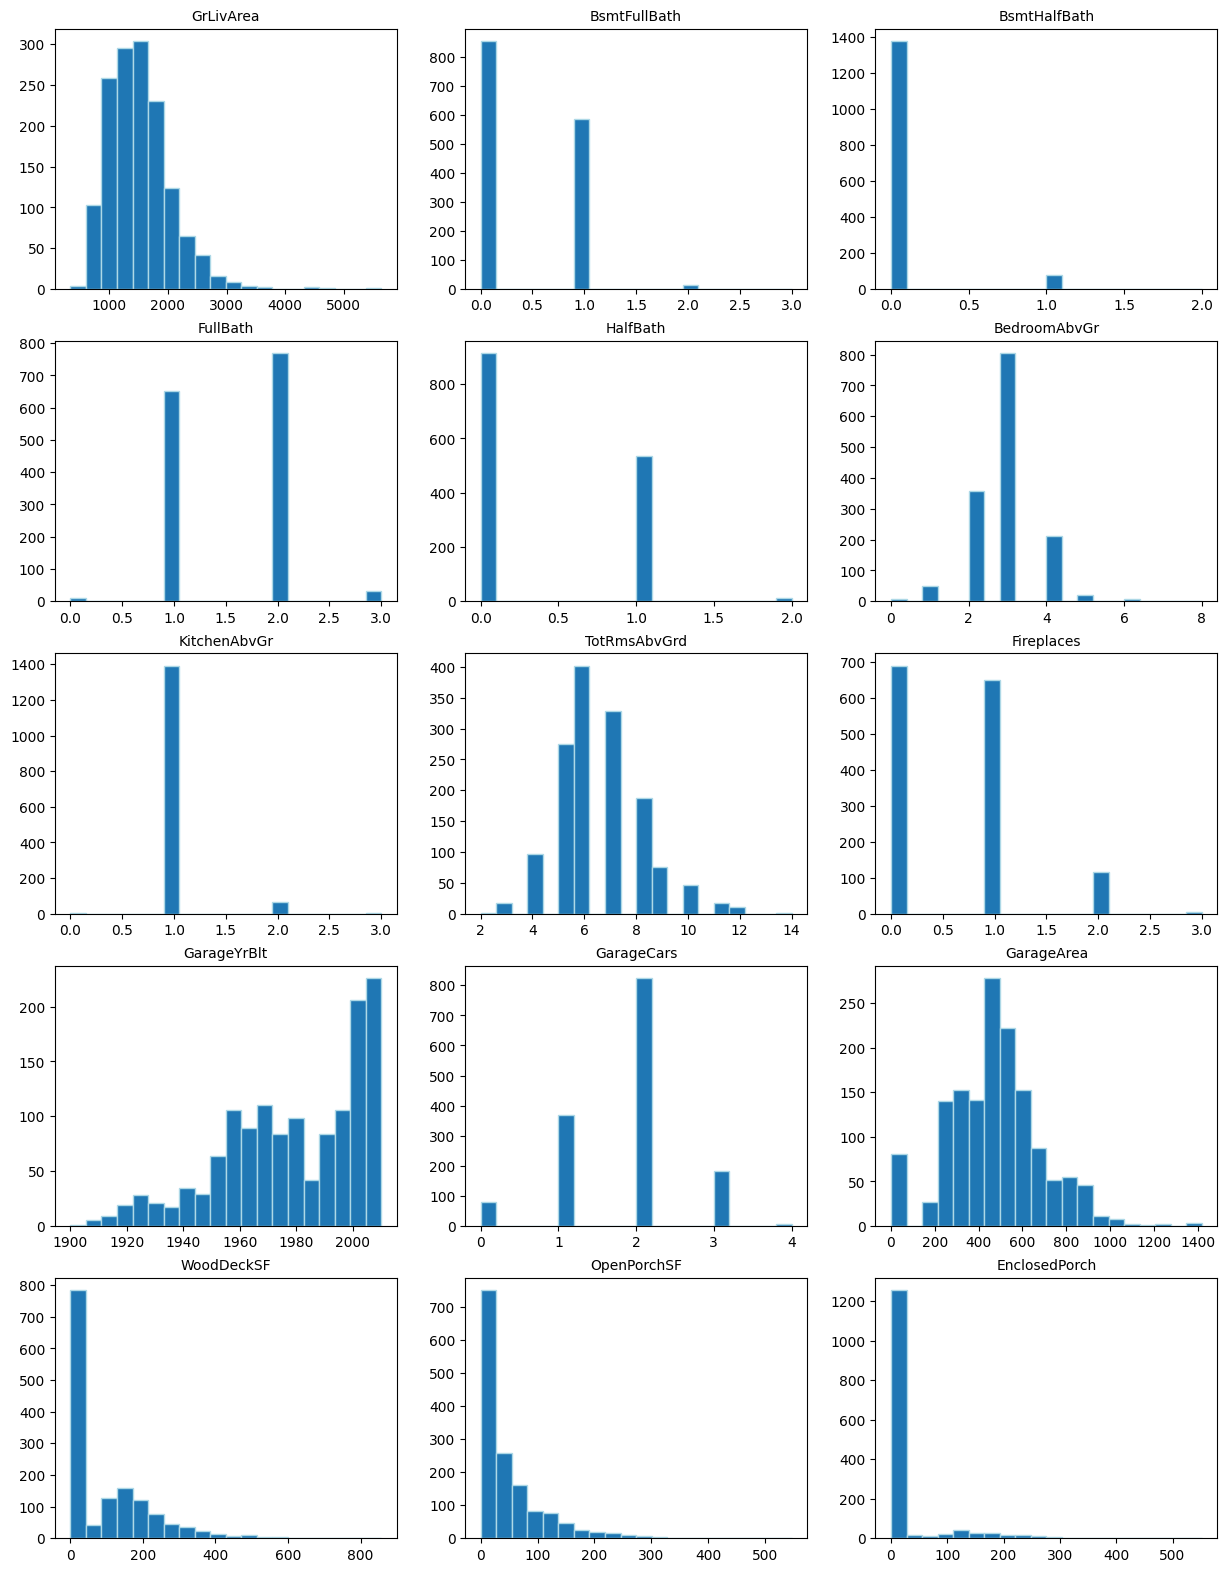

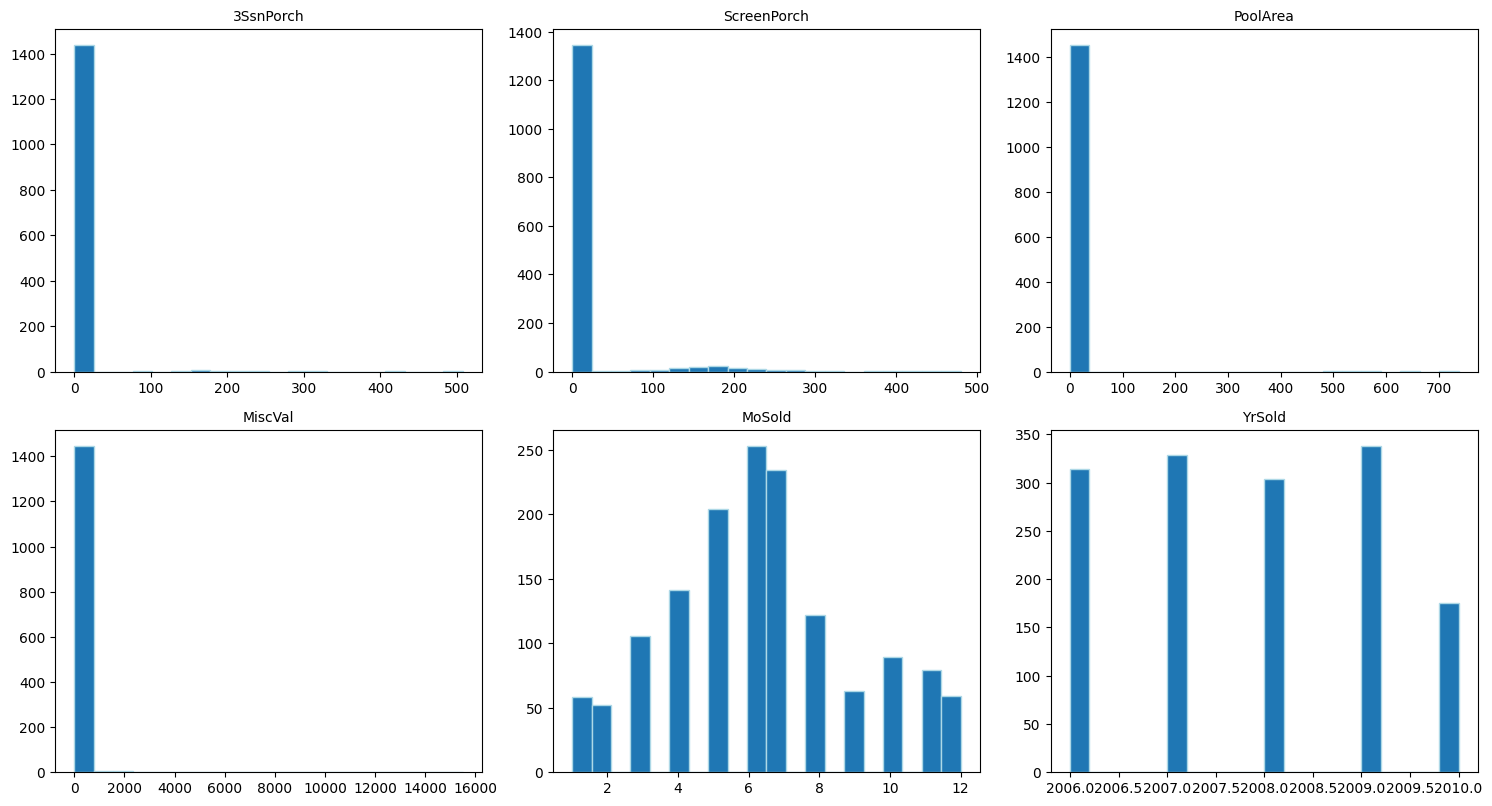

In [14]:
import math


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'SalePrice' and col != "Id"]

n = len(numerical_cols)

cols = 3
rows = math.ceil(n / cols)

group_size = 15

groups = [numerical_cols[i:i+group_size] for i in range(0, len(numerical_cols), group_size)]

for group_index, group in enumerate(groups):
    plt.figure(figsize=(cols * 5, rows * 4))

    for i, col in enumerate(group, 1):
        plt.subplot(rows, cols, i)
        plt.hist(df[col], bins=20, edgecolor='lightblue')
        plt.title(col, fontsize=10)
        plt.xlabel("")
        plt.ylabel("")

plt.tight_layout()
plt.show()

# 2) Tiền xử lý và feature engineer

In [15]:
# --- 1. Tải Dữ Liệu ---
print("Đang tải dữ liệu...")
try:
    train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
    test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy tệp dữ liệu. Vui lòng kiểm tra lại đường dẫn.")
    exit()

Đang tải dữ liệu...


In [16]:
# Giữ lại ID để nộp bài
test_ids = test_df['Id']
# Giữ lại SalePrice và bỏ nó ra khỏi tập train
target = train_df['SalePrice']
train_df = train_df.drop('SalePrice', axis=1)

print(f"Kích thước tập train ban đầu: {train_df.shape}")
print(f"Kích thước tập test ban đầu: {test_df.shape}")

Kích thước tập train ban đầu: (1460, 80)
Kích thước tập test ban đầu: (1459, 80)


In [17]:
# --- 2. Xử lý Dữ liệu Bị thiếu (Giống hệt Notebook) ---

# 2.1. Xử lý Tập Train
print("Đang xử lý tập train...")
# Xóa 6 cột có nhiều NaN
cols_to_drop = ['Alley', 'Fence', 'FireplaceQu', 'PoolQC', 'MasVnrType', 'MiscFeature']
train_df = train_df.drop(cols_to_drop, axis=1)

# Xóa các hàng có NaN ở 12 cột quan trọng
cols_to_dropna = [
    'LotFrontage', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'GarageType', 'GarageYrBlt', 'GarageFinish',
    'GarageQual', 'GarageCond', 'MasVnrArea'
]
train_df = train_df.dropna(subset=cols_to_dropna)

# Điền khuyết (Impute) cho 1 hàng thiếu 'Electrical'
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

print(f"Kích thước tập train sau khi làm sạch: {train_df.shape}")

# <<< SỬA 1: Lấy 'train_indices' ngay sau khi làm sạch train_df
# Đây là các chỉ số (1095 hàng) mà chúng ta đã giữ lại
train_indices = train_df.index

# 2.2. Xử lý Tập Test (Đồng bộ hóa các cột)
# Xóa 6 cột tương tự trong tập test
test_df = test_df.drop(cols_to_drop, axis=1)

Đang xử lý tập train...
Kích thước tập train sau khi làm sạch: (1095, 74)


In [18]:
# --- 3. Xử lý Ngoại lệ (Outlier) và Biến đổi Mục tiêu (Giống hệt) ---
print("Đang xử lý Outliers và Log Transform cho SalePrice...")
# Giới hạn (cap) SalePrice ở mức 99.5th percentile
price_cap = np.percentile(target, 99.5)
target = target.clip(upper=price_cap)

# <<< SỬA 2: Lọc 'target' bằng 'train_indices' KHI tạo 'y'
# Điều này đảm bảo 'y' cũng có 1095 hàng, khớp với 'X'
y = np.log1p(target.loc[train_indices])

# Gộp train và test để xử lý đồng bộ
# Chỉ gộp các index còn lại của train_df
full_df = pd.concat([train_df, test_df], axis=0)
print(f"Kích thước dữ liệu gộp (full_df): {full_df.shape}")

Đang xử lý Outliers và Log Transform cho SalePrice...
Kích thước dữ liệu gộp (full_df): (2554, 74)


In [19]:
# --- 4. Kỹ thuật Đặc trưng (Feature Engineering)---
print("Đang tạo đặc trưng mới (TotalSF, TotalBath, HouseAge)...")
full_df['TotalSF'] = full_df['TotalBsmtSF'] + full_df['1stFlrSF'] + full_df['2ndFlrSF']
full_df['TotalBath'] = (full_df['FullBath'] + (0.5 * full_df['HalfBath']) +
                        full_df['BsmtFullBath'] + (0.5 * full_df['BsmtHalfBath']))
full_df['HouseAge'] = full_df['YrSold'] - full_df['YearBuilt']

Đang tạo đặc trưng mới (TotalSF, TotalBath, HouseAge)...


In [20]:
# --- 5. Biến đổi Đặc trưng (Feature Transformation)---
print("Đang áp dụng Log Transform cho 10 đặc trưng số bị lệch...")
skewed_cols = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
    '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'
]
# Xử lý trường hợp có giá trị 0 trước khi log
for col in skewed_cols:
    # Điền 0 cho NaN (nếu có) trước khi log
    full_df[col] = full_df[col].fillna(0) 
    full_df[col] = np.log1p(full_df[col])

Đang áp dụng Log Transform cho 10 đặc trưng số bị lệch...


In [21]:
# --- 6. Xử lý Dữ liệu Bị thiếu (Phiên bản CatBoost) ---
print("Đang điền khuyết giá trị (CatBoost-style)...")

# 6.1. Xác định các cột số và category
num_cols = full_df.select_dtypes(include=np.number).columns
cat_cols = full_df.select_dtypes(include='object').columns

# 6.2. Điền khuyết Cột Số (Giống hệt notebook)
# Lấy giá trị mean TỪ TẬP TRAIN đã làm sạch
train_mean = full_df.loc[train_indices, num_cols].mean()
full_df[num_cols] = full_df[num_cols].fillna(train_mean)

# 6.3. Điền khuyết Cột Category (Tối ưu cho CatBoost)
# Thay vì OHE, CatBoost chỉ cần một placeholder
full_df[cat_cols] = full_df[cat_cols].fillna('Missing')

Đang điền khuyết giá trị (CatBoost-style)...


In [22]:
# --- 7. Tách Dữ liệu (Không cần OHE/Scaling) ---
print("Đang tách lại dữ liệu train/test...")
# X giờ đây sẽ lấy 'len(train_indices)' hàng đầu tiên, tức 1095 hàng
X = full_df.iloc[:len(train_indices)]
X_test = full_df.iloc[len(train_indices):]

# Xác định danh sách tên các cột category cho CatBoost
cat_features_list = cat_cols.tolist()

print(f"Kích thước X (Data): {X.shape[0]}")
print(f"Kích thước y (Label): {y.shape[0]}")

Đang tách lại dữ liệu train/test...
Kích thước X (Data): 1095
Kích thước y (Label): 1095


# 3) Mô hình hoá và thực hiện dự đoán

In [23]:
# --- Huấn luyện Mô hình CatBoost ---
print("Đang huấn luyện CatBoostRegressor...")

# Khởi tạo mô hình
model_cat = CatBoostRegressor(
    iterations=2000,          
    learning_rate=0.03,       
    depth=6,                  
    loss_function='RMSE',     
    eval_metric='RMSE',       
    cat_features=cat_features_list, 
    random_seed=42,
    verbose=200,              
    early_stopping_rounds=100 
)

# Huấn luyện mô hình
# (X, y) giờ đã đồng bộ (1095 hàng)
# Tập validation (X.iloc[1000:], y.iloc[1000:]) cũng đồng bộ
model_cat.fit(X, y, eval_set=(X.iloc[1000:], y.iloc[1000:])) 

# --- Dự đoán và Nộp bài ---
print("Đang dự đoán trên tập test...")
test_preds_log = model_cat.predict(X_test)

# Biến đổi ngược (inverse transform) từ log về giá trị gốc
final_preds = np.expm1(test_preds_log)

# Xử lý nếu có giá trị âm (hiếm)
final_preds[final_preds < 0] = 0

# Tạo tệp submission
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': final_preds})
submission.to_csv('catboost_submission.csv', index=False)

print("\n--- Hoàn tất! ---")
print("Tệp 'catboost_submission.csv' đã được tạo thành công.")
print(submission.head())

Đang huấn luyện CatBoostRegressor...
0:	learn: 0.3830422	test: 0.3588392	best: 0.3588392 (0)	total: 73.1ms	remaining: 2m 26s
200:	learn: 0.1028770	test: 0.1014706	best: 0.1014678 (199)	total: 3.6s	remaining: 32.2s
400:	learn: 0.0834674	test: 0.0877036	best: 0.0877036 (400)	total: 7.2s	remaining: 28.7s
600:	learn: 0.0722666	test: 0.0795142	best: 0.0794901 (599)	total: 11s	remaining: 25.6s
800:	learn: 0.0644896	test: 0.0727232	best: 0.0727232 (800)	total: 14.7s	remaining: 22s
1000:	learn: 0.0589552	test: 0.0675697	best: 0.0675697 (1000)	total: 18.5s	remaining: 18.5s
1200:	learn: 0.0538214	test: 0.0628842	best: 0.0628842 (1200)	total: 22.4s	remaining: 14.9s
1400:	learn: 0.0487460	test: 0.0580054	best: 0.0580048 (1399)	total: 26.2s	remaining: 11.2s
1600:	learn: 0.0441558	test: 0.0536486	best: 0.0536486 (1600)	total: 30.1s	remaining: 7.51s
1800:	learn: 0.0402771	test: 0.0498237	best: 0.0498237 (1800)	total: 34s	remaining: 3.76s
1999:	learn: 0.0369366	test: 0.0468922	best: 0.0468922 (1999)	t

--- Tái tạo dữ liệu hoàn tất ---

--- Giai đoạn 1: Đánh giá Baselines ---
Baseline 'Ngây thơ' (Trung vị) RMSLE: 0.392581
Đang chạy K-Fold cho Baseline 'Đơn giản' (Ridge)...
Baseline 'Đơn giản' (3 Feats + Ridge) K-Fold RMSLE: 0.172868

--- Giai đoạn 2: Đánh giá Mô hình CatBoost (K-Fold) ---
Bắt đầu K-Fold cho CatBoost (sẽ mất một lúc)...
Mô hình CatBoost (Full Feats) K-Fold RMSLE: 0.117483

--- Giai đoạn 3: Phân tích Feature Importance (Goal 2) ---
Đang huấn luyện mô hình CatBoost đầy đủ...
Đã lưu 'catboost_feature_importance.png'

--- Giai đoạn 4: Phân tích Khuyến nghị & Lỗi (Goal 4) ---
Đang tạo Partial Dependence Plots cho: ['TotalSF', 'OverallQual']...
Đã lưu 'catboost_pdp.png'
Đang tạo Biểu đồ Phân tích Lỗi (Residual Plot)...
Đã lưu 'catboost_residual_plot.png'

--- TỔNG KẾT SO SÁNH HIỆU SUẤT (RMSLE) ---
| Baseline 'Ngây thơ' (Trung vị):   	 | 0.392581 |
| Baseline 'Đơn giản' (3 Feats + Ridge): 	 | 0.172868 |
| Mô hình CatBoost (Full Feats + K-Fold): | 0.117483 |
RMSLE càng thấp, m

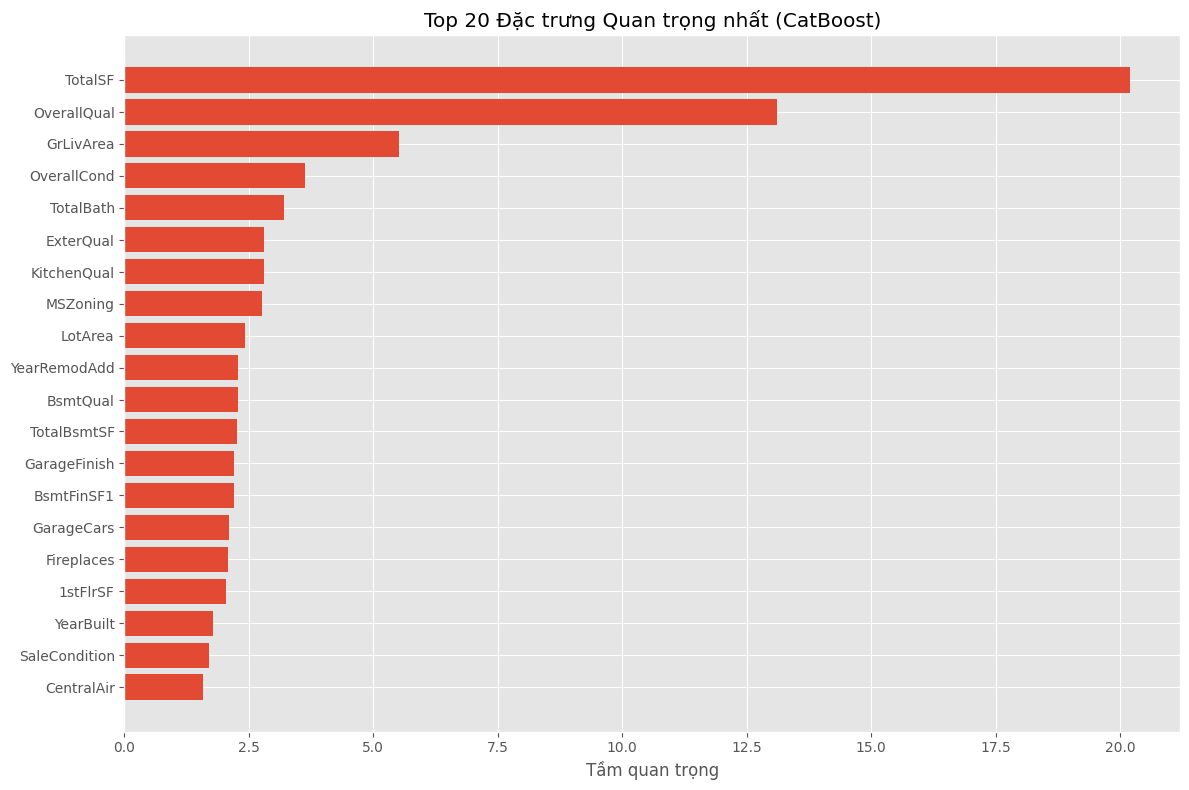

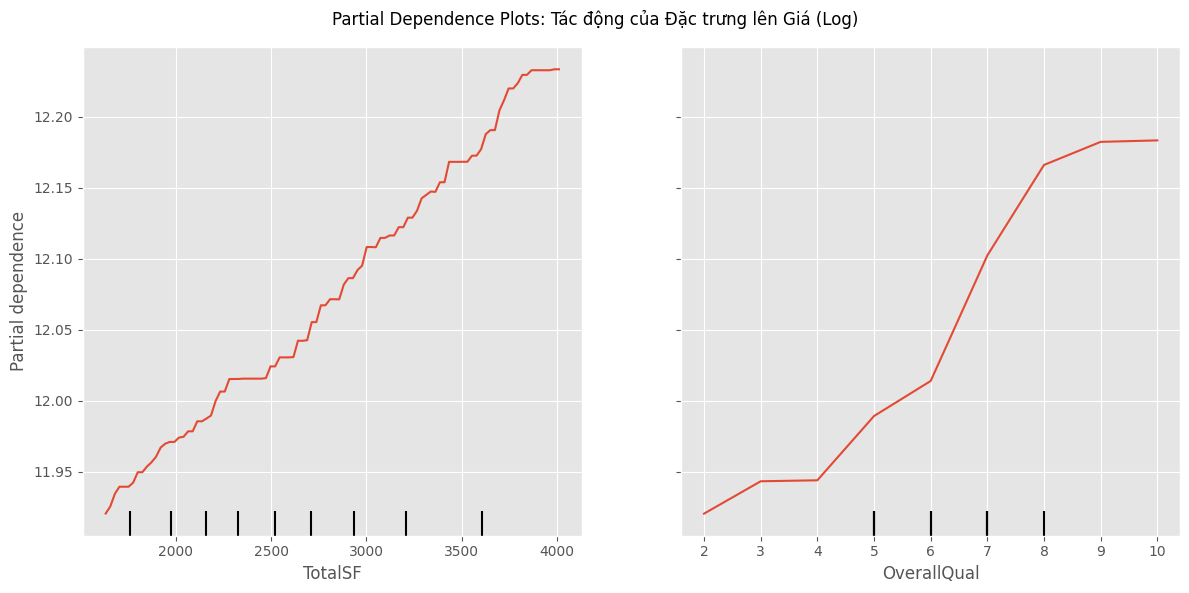

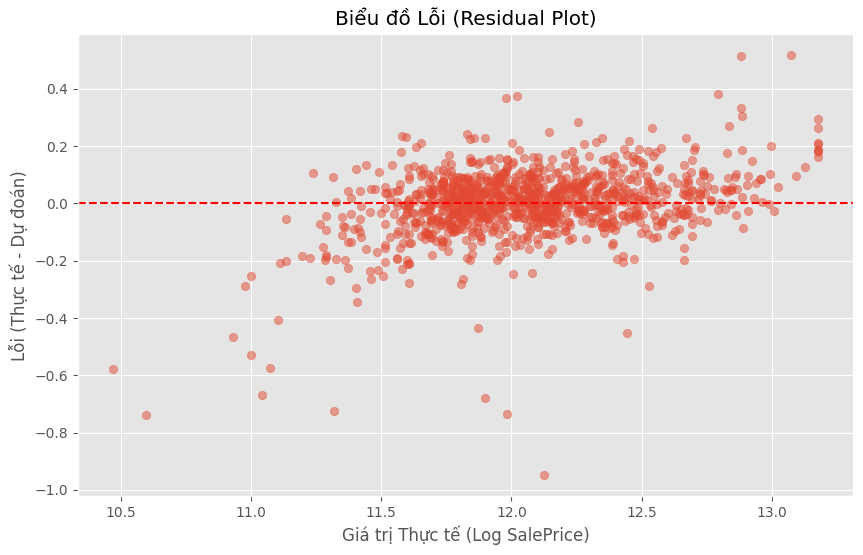

In [24]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import warnings

# Tắt các cảnh báo không cần thiết
warnings.filterwarnings('ignore')
plt.style.use('ggplot') # Sử dụng style cho biểu đồ đẹp hơn

# --- Tách dữ liệu cho CatBoost (Dữ liệu 1) ---
X_cat = full_df.iloc[:len(train_indices)]
X_test_cat = full_df.iloc[len(train_indices):]
cat_features_list = cat_cols.tolist()
print("--- Tái tạo dữ liệu hoàn tất ---")

# Cài đặt K-Fold chung
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# -------------------------------------------------------------------
# --- GIAI ĐOẠN 1: BASELINES ---
# -------------------------------------------------------------------
print("\n--- Giai đoạn 1: Đánh giá Baselines ---")

# 1.1 Baseline "Ngây thơ" (Dự đoán bằng Trung vị)
y_median = y.median()
baseline_naive_preds = np.full(shape=y.shape, fill_value=y_median)
avg_rmsle_naive = np.sqrt(mean_squared_error(y, baseline_naive_preds))
print(f"Baseline 'Ngây thơ' (Trung vị) RMSLE: {avg_rmsle_naive:.6f}")

# 1.2 Baseline "Đơn giản" (3 đặc trưng + Ridge)
print("Đang chạy K-Fold cho Baseline 'Đơn giản' (Ridge)...")
# Tải lại dữ liệu gốc chỉ để lấy 3 cột này
train_simple = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train_simple = train_simple.loc[train_indices] # Lọc lại 1095 hàng

simple_features = ['OverallQual', 'GrLivArea', 'Neighborhood']
X_simple = train_simple[simple_features]
y_simple = y # y đã được lọc

# Tạo pipeline cho 3 đặc trưng này: OHE cho Neighborhood, Scale cho 2 cột số
simple_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['OverallQual', 'GrLivArea']),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Neighborhood'])
    ])

simple_model = make_pipeline(simple_preprocessor, Ridge(alpha=10))

fold_scores_simple = []
for fold, (train_index, val_index) in enumerate(kf.split(X_simple, y_simple)):
    X_train, X_val = X_simple.iloc[train_index], X_simple.iloc[val_index]
    y_train, y_val = y_simple.iloc[train_index], y_simple.iloc[val_index]
    
    simple_model.fit(X_train, y_train)
    val_preds = simple_model.predict(X_val)
    fold_rmsle = np.sqrt(mean_squared_error(y_val, val_preds))
    fold_scores_simple.append(fold_rmsle)
    
avg_rmsle_simple = np.mean(fold_scores_simple)
print(f"Baseline 'Đơn giản' (3 Feats + Ridge) K-Fold RMSLE: {avg_rmsle_simple:.6f}")

# -------------------------------------------------------------------
# --- GIAI ĐOẠN 2: ĐÁNH GIÁ MÔ HÌNH CHÍNH (CATBOOST K-FOLD) ---
# -------------------------------------------------------------------
print("\n--- Giai đoạn 2: Đánh giá Mô hình CatBoost (K-Fold) ---")
fold_scores_catboost = []
# Mảng để lưu dự đoán Out-of-Fold (cho Giai đoạn 4)
oof_predictions = np.zeros(X_cat.shape[0])

for fold, (train_index, val_index) in enumerate(kf.split(X_cat, y)):
    if fold == 0: print("Bắt đầu K-Fold cho CatBoost (sẽ mất một lúc)...")
    X_train, X_val = X_cat.iloc[train_index], X_cat.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model_cat_fold = CatBoostRegressor(
        iterations=2000, learning_rate=0.03, depth=6,
        loss_function='RMSE', eval_metric='RMSE',
        cat_features=cat_features_list, random_seed=42,
        verbose=0, early_stopping_rounds=100 
    )
    model_cat_fold.fit(X_train, y_train, eval_set=(X_val, y_val))
    val_preds = model_cat_fold.predict(X_val)
    oof_predictions[val_index] = val_preds # Lưu dự đoán OOF
    fold_rmsle = np.sqrt(mean_squared_error(y_val, val_preds))
    fold_scores_catboost.append(fold_rmsle)

avg_rmsle_catboost_kfold = np.mean(fold_scores_catboost)
print(f"Mô hình CatBoost (Full Feats) K-Fold RMSLE: {avg_rmsle_catboost_kfold:.6f}")

# -------------------------------------------------------------------
# --- GIAI ĐOẠN 3: PHÂN TÍCH YẾU TỐ ẢNH HƯỞNG (Goal 2) ---
# -------------------------------------------------------------------
print("\n--- Giai đoạn 3: Phân tích Feature Importance (Goal 2) ---")
# Huấn luyện 1 mô hình CatBoost trên TOÀN BỘ dữ liệu train
model_cat_full = CatBoostRegressor(
    iterations=1000, # Dùng ít iterations hơn (hoặc dùng best_iter từ K-Fold)
    learning_rate=0.03, depth=6,
    loss_function='RMSE', eval_metric='RMSE',
    cat_features=cat_features_list, random_seed=42,
    verbose=0
)
print("Đang huấn luyện mô hình CatBoost đầy đủ...")
model_cat_full.fit(X_cat, y)

# Lấy Feature Importance
importances = model_cat_full.get_feature_importance()
feat_imp_df = pd.DataFrame({
    'feature': X_cat.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Vẽ Top 20
plt.figure(figsize=(12, 8))
top_20_feats = feat_imp_df.head(20)
plt.barh(top_20_feats['feature'], top_20_feats['importance'])
plt.title('Top 20 Đặc trưng Quan trọng nhất (CatBoost)')
plt.xlabel('Tầm quan trọng')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('catboost_feature_importance.png')
print("Đã lưu 'catboost_feature_importance.png'")

# -------------------------------------------------------------------
# --- GIAI ĐOẠN 4: KHUYẾN NGHỊ & PHÂN TÍCH LỖI (Goal 4) ---
# -------------------------------------------------------------------
print("\n--- Giai đoạn 4: Phân tích Khuyến nghị & Lỗi (Goal 4) ---")

# 4.1. Partial Dependence Plots (PDP)
top_2_features = top_20_feats['feature'].iloc[:2].tolist()
print(f"Đang tạo Partial Dependence Plots cho: {top_2_features}...")

# Cần chuyển đổi X_cat (có category) thành số mà PDP có thể hiểu
# (Lưu ý: PDP với CatBoost có thể phức tạp, chúng ta sẽ thử với 2 feature)
try:
    fig, ax = plt.subplots(figsize=(12, 6))
    PartialDependenceDisplay.from_estimator(
        model_cat_full,
        X_cat,
        features=top_2_features, # ['OverallQual', 'TotalSF']
        ax=ax
    )
    plt.suptitle('Partial Dependence Plots: Tác động của Đặc trưng lên Giá (Log)')
    plt.tight_layout()
    plt.savefig('catboost_pdp.png')
    print("Đã lưu 'catboost_pdp.png'")
except Exception as e:
    print(f"Lỗi khi tạo PDP (có thể do xử lý category): {e}")


# 4.2. Phân tích Lỗi (Residual Analysis)
print("Đang tạo Biểu đồ Phân tích Lỗi (Residual Plot)...")
# Sử dụng y (log-price) và dự đoán oof
residuals = y - oof_predictions

plt.figure(figsize=(10, 6))
# Vẽ biểu đồ phân tán: Giá trị Thực tế vs Lỗi
# Lý tưởng: một đám mây điểm ngẫu nhiên quanh đường 0
plt.scatter(y, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Biểu đồ Lỗi (Residual Plot)')
plt.xlabel('Giá trị Thực tế (Log SalePrice)')
plt.ylabel('Lỗi (Thực tế - Dự đoán)')
plt.savefig('catboost_residual_plot.png')
print("Đã lưu 'catboost_residual_plot.png'")

# -------------------------------------------------------------------
# --- TỔNG KẾT ---
# -------------------------------------------------------------------
print("\n--- TỔNG KẾT SO SÁNH HIỆU SUẤT (RMSLE) ---")
print("="*50)
print(f"| Baseline 'Ngây thơ' (Trung vị):   \t | {avg_rmsle_naive:.6f} |")
print(f"| Baseline 'Đơn giản' (3 Feats + Ridge): \t | {avg_rmsle_simple:.6f} |")
print(f"| Mô hình CatBoost (Full Feats + K-Fold): | {avg_rmsle_catboost_kfold:.6f} |")
print("="*50)
print("RMSLE càng thấp, mô hình càng tốt.")